## Numerical and Textual Stock Price Prediction 
### Author: Naveen Roy
#### Task 4

In [1]:
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt
import seaborn as sns

from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)

from textblob import TextBlob
import re
from collections import Counter
import nltk

## Importing Data

In [2]:
data=pd.read_csv("C:/Users/navee/Desktop/SENSEX (S&P BSE SENSEX).csv")
data2=pd.read_csv("C:/Users/navee/Desktop/india-news-headlines.csv")

In [3]:
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-06,2929.75,2942.75,2928.00,2941.75,2941.75,1947134.0
1,2019-10-07,2929.75,2959.50,2928.00,2937.50,2937.50,1266872.0
2,2019-10-08,2934.50,2950.00,2890.50,2892.50,2892.50,1865325.0
3,2019-10-09,2893.50,2934.25,2888.25,2919.00,2919.00,1305749.0
4,2019-10-10,2920.50,2954.00,2881.75,2941.00,2941.00,1577766.0


In [4]:
data2.head(5)

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


## Data Analysis

In [5]:
data.isna().sum()

Date         0
Open         8
High         8
Low          8
Close        8
Adj Close    8
Volume       8
dtype: int64

In [6]:
data.dropna(subset=['Open'], inplace=True)
data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
data2.isna().sum()

publish_date         0
headline_category    0
headline_text        0
dtype: int64

## Visualising

E:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


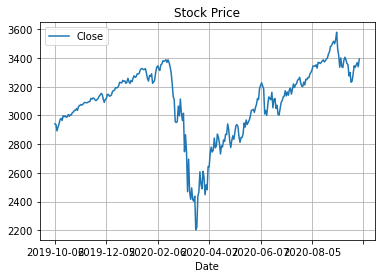

In [8]:
data.plot(kind='line',x='Date',y='Close')
plt.title('Stock Price')
plt.grid()
plt.show()

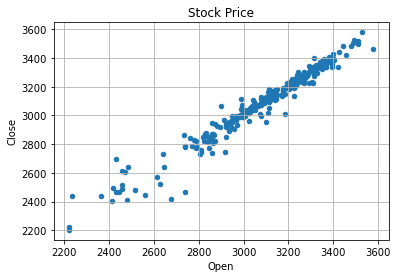

In [38]:
data.plot(kind='scatter',x='Open',y='Close')
plt.title('Stock Price')
plt.grid()
plt.show()

## Splitting data to X and Y for training and testing

In [10]:
x=data[['Open','High','Low','Volume','Adj Close']].values

In [11]:
y=data['Close'].values

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

## Importing Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

## Testing the model using Linear Regressor

In [16]:
df=pd.DataFrame({'Actual':y_test,'Predict':y_pred})
df.head(5)

,Actual,Predict
0,3227.50,3227.50
1,3264.75,3264.75
2,3405.25,3405.25
3,2870.00,2870.00
4,3047.75,3047.75


## Calculating R2 Score

In [17]:
from sklearn.metrics import r2_score 
print('r2 score for the model is',r2_score(y_pred,y_test))

r2 score for the model is 1.0


## Using Decision Tree Regressor

In [18]:
from sklearn.tree import DecisionTreeRegressor

In [19]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
y_pred=dtr.predict(x_test)

## Testing the model using DecisionTree Regressor

In [20]:
df1=pd.DataFrame({'Actual':y_test,'Predict':y_pred})
df1.head(5)

,Actual,Predict
0,3227.50,3228.25
1,3264.75,3262.25
2,3405.25,3392.50
3,2870.00,2867.25
4,3047.75,3038.00


## R2 Score 

In [21]:
from sklearn.metrics import r2_score 
print('r2 score for the model is',r2_score(y_pred,y_test))

r2 score for the model is 0.9954881043431505


## Random Forest Regressor

In [22]:
from sklearn.ensemble import RandomForestRegressor 

In [23]:
rfr=RandomForestRegressor ()
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)

## Testing Model using Random Forrest Regressor

In [24]:
df2=pd.DataFrame({'Actual':y_test,'Predict':y_pred})
df2.head(5)

,Actual,Predict
0,3227.50,3228.5179
1,3264.75,3265.8675
2,3405.25,3397.1200
3,2870.00,2867.7050
4,3047.75,3048.4550


## R2 score 

In [25]:
from sklearn.metrics import r2_score 
print('r2 score for the model is',r2_score(y_pred,y_test))

r2 score for the model is 0.994166878671802


## Result 
### We choose Linear Regressor for this project since its predicted values with actual values is same and r2 score is high

## Textual Stock price Prediction 

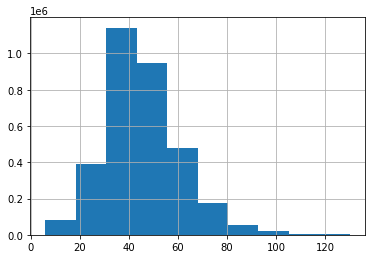

In [20]:
data2['headline_text'].str.len().hist()
plt.show()

#### The histogram shows that news headlines range from 10 to 70 characters and generally, it is between 25 to 55 characters.

## Analysing using WordCloud

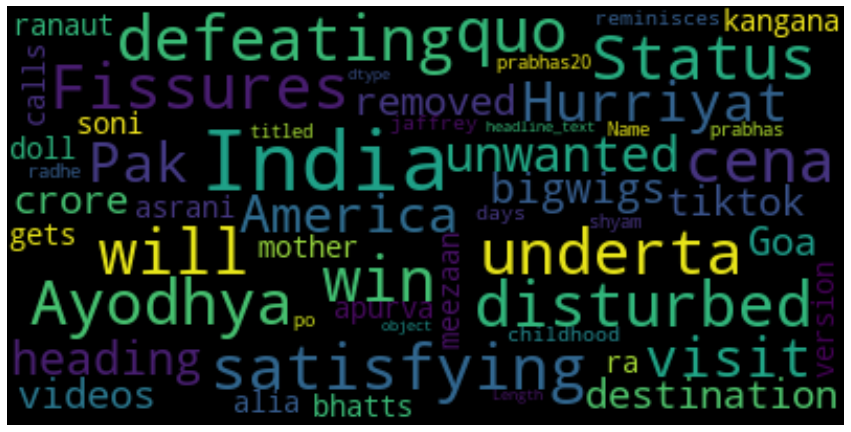

In [34]:
def show_wordcloud(data , title = None):
    wordcloud = WordCloud(background_color='black',stopwords=stopwords,max_words=200,max_font_size=40).generate(str(data))
  
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    plt.title(title, size = 25)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

show_wordcloud(data2['headline_text'])

## Applying TextBlob
### finding out polarity

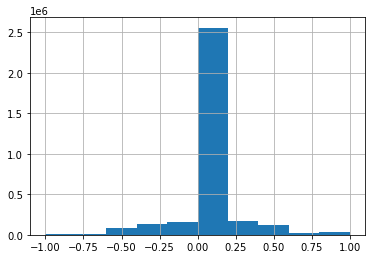

In [31]:
def polarity(text):
    return TextBlob(text).sentiment.polarity
data2['polarity_score']=data2['headline_text'].apply (lambda x:polarity(x))
data2['polarity_score'].hist()
plt.show()

#### The polarity mainly ranges between 0.00 and 0.20. This indicates that the majority of the news headlines are neutral.

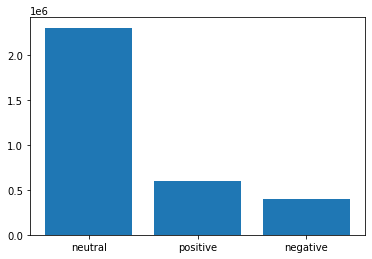

In [35]:
def sentiment(x):
    if x<0:
        return 'negative'
    elif x==0:
        return 'neutral'
    else:
        return 'positive'
    
data2['polarity']=data2['polarity_score'].\
   map(lambda x: sentiment(x))
plt.bar(data2.polarity.value_counts().index,
        data2.polarity.value_counts())
plt.show()

#### Most of the news headlines is neutral from the graph

## Results

### We choose Linear Regressor for this project since its predicted values with actual values is same and r2 score is high
###  By using Sentimental Analysis we analysed the texual data and figured the Positive,Negative and Neutral News headlines